In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10172524/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

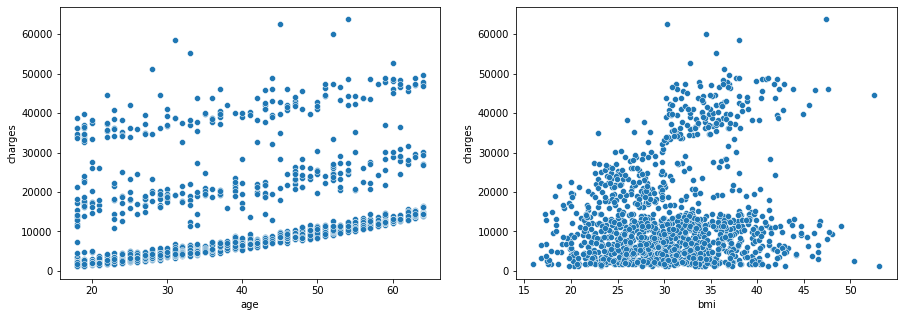

In [6]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
sns.scatterplot(x = 'age', y = 'charges', data = df, ax = axs[0])
sns.scatterplot(x = 'bmi', y = 'charges', data = df, ax = axs[1])
plt.show()

## Thực hiện mã hóa categorical columns

In [14]:
df = pd.get_dummies(df)
df.drop(columns=['sex_male', 'smoker_no'],inplace=True)

In [21]:
X = df.iloc[:,:-1]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Sử dụng Linear Regression

In [23]:
model = LinearRegression()
model = model.fit(X_train,y_train)

## Đánh giá mô hình trên tập train

In [24]:
MSE_train = mean_squared_error(y_train, model.predict(X_train))
r2_train = r2_score(y_train, model.predict(X_train))
print(f'Mean square error tập train: {MSE_train}')
print(f'R-square tập train: {r2_train}')

Mean square error tập train: 1.495481668548922e-23
R-square tập train: 1.0


### Conclusion:
- Mô hình rất tốt vì dự đoán toàn bộ trường hợp xảy ra

## Đánh giá mô hình trên tập test

In [25]:
MSE_test = mean_squared_error(y_test, model.predict(X_test))
r2_test = r2_score(y_test, model.predict(X_test))
print(f'Mean square error tập train: {MSE_test}')
print(f'R-square tập train: {r2_test}')

Mean square error tập train: 1.201591725170605e-23
R-square tập train: 1.0


### Conclusion :
- Mô hình dự đoán tốt trên tập test và tốt hơn trên tập train.